In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
bill_data = pd.read_csv("bills.csv")
venue_data = pd.read_csv("venues.csv")

In [13]:
q4_data = bill_data.copy().merge(venue_data[['venue_xref_id', 'start_of_day_offset']], on='venue_xref_id', how='left')

q4_data = q4_data[['start_of_day_offset','bill_total_net','bill_total_billed','payment_total_tip', 'venue_xref_id']].copy()

In [15]:
offsets = list(set(q4_data['start_of_day_offset'].to_list()))

In [18]:
offset_dict = dict()
for offset in offsets:
    offset_dict[offset] = q4_data.loc[q4_data['start_of_day_offset'] == offset]

In [21]:
offsets.sort()
print(offsets)

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '23:00:00']


In [22]:
avg_tip = []
avg_bill = []
for offset in offsets:
    temp = offset_dict[offset]
    avg_bill.append(temp['bill_total_net'].mean())
    avg_tip.append(temp['payment_total_tip'].mean())

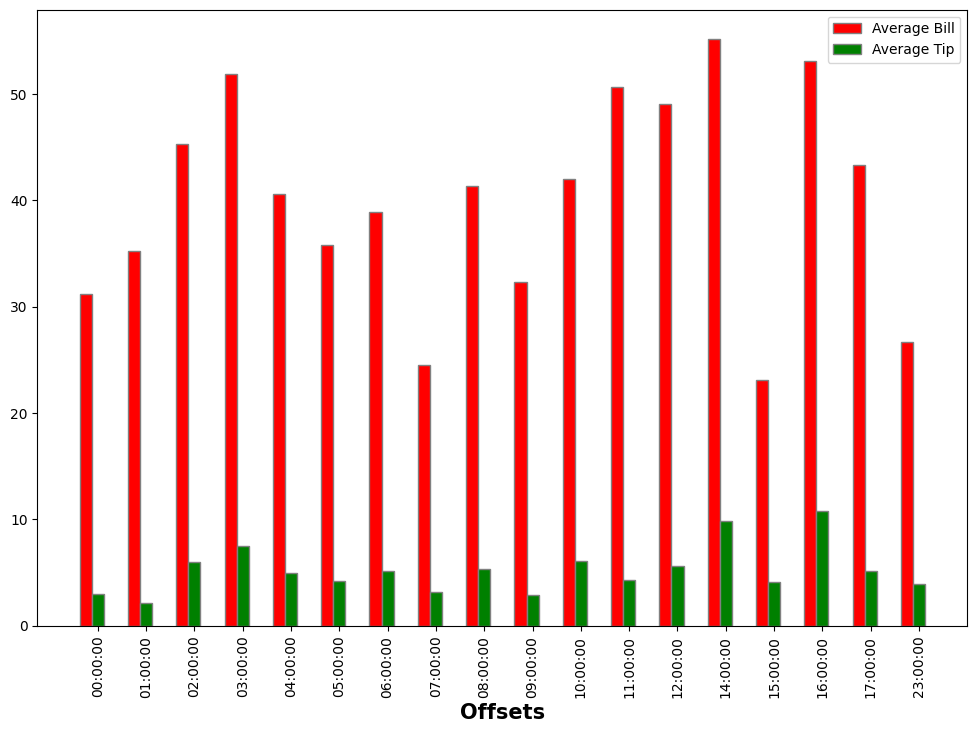

In [24]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

br1 = np.arange(len(avg_bill)) 
br2 = [x + barWidth for x in br1] 


plt.bar(br1, avg_bill, color ='r', width = barWidth, 
    edgecolor ='grey', label ='Average Bill') 
plt.bar(br2, avg_tip, color ='g', width = barWidth, 
    edgecolor ='grey', label ='Average Tip') 


plt.xlabel('Offsets', fontweight ='bold', fontsize = 15)  
plt.xticks([r + barWidth for r in range(len(avg_bill))], offsets, rotation=90)

plt.legend()
plt.show()